In [3]:
# Import our dependencies
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Import our input dataset
#weather_df_original = pd.read_csv('weather.csv', encoding='latin-1')
#price_demand_df_original = pd.read_csv('price_and_demand.csv', encoding='latin-1')

weather_df_original = pd.read_csv('Resources/weather.csv', encoding='latin-1')
price_demand_df_original = pd.read_csv('https://raw.githubusercontent.com/Alphaomegainfinity/energy_consumption_vs_weather_data/main/Resources/price_and_demand.csv', encoding='latin-1')

In [5]:
# Checking any missing values per column and per rows
def data_checking(weather):
    # Identify NaN or empty values
    missing_values = weather.isna().sum()

    # Identify incorrect value types
    incorrect_types = weather.apply(lambda x: pd.to_numeric(x, errors='coerce').isna().sum())

    # Combine the results into a DataFrame
    cleaning_report = pd.DataFrame({'Missing Values': missing_values, 'Incorrect Types': incorrect_types})

    return cleaning_report

### Processing Weather file

In [6]:
data_checking (weather_df_original)

,Missing Values,Incorrect Types
Date,0,175
Minimum temperature (°C),0,0
Maximum temperature (°C),1,1
Rainfall (mm),0,0
Direction of maximum wind gust,1,175
Speed of maximum wind gust (km/h),1,1
Time of maximum wind gust,1,175
9am Temperature (°C),0,0
9am relative humidity (%),0,0
9am wind direction,0,175


In [7]:
# Create a copy of the original dataframe to avoid modifying it
weather_df = weather_df_original.copy()
price_demand_df = price_demand_df_original.copy()

In [8]:
# Drop off all empty columns
weather_df = weather_df.dropna(axis=1, how='all')
weather_df

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/11/22,8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
1,2/11/22,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2,3/11/22,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
3,4/11/22,10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
4,5/11/22,11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,20/04/2023,7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
171,21/04/2023,11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
172,22/04/2023,14.6,19.2,0.0,SSW,22.0,16:09,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7
173,23/04/2023,14.8,19.0,0.0,SSW,26.0,15:45,16.7,79,SSE,7,1034.4,17.8,71.0,SSW,13.0,1032.4


In [9]:
# Convert the Date column to datetime64
weather_df['Date'] = pd.to_datetime(weather_df['Date'], dayfirst=True)

In [10]:
# check the data types
weather_df.dtypes

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Direction of maximum wind gust               object
Speed of maximum wind gust (km/h)           float64
Time of maximum wind gust                    object
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind direction                           object
9am wind speed (km/h)                        object
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind direction                           object
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object

In [11]:
# Drop off all rows that have more than 4 missing values
weather_df = weather_df.dropna(thresh=len(weather_df.columns)-4)

In [12]:
# Set the Time of maximum wind gust column to numeric:
weather_df['Time of maximum wind gust'] = pd.to_timedelta(weather_df['Time of maximum wind gust'].apply(lambda x: x.zfill(5)))


ValueError: expected hh:mm:ss format

In [13]:
# Replace 'calm' with 0
weather_df['9am wind speed (km/h)'] = weather_df['9am wind speed (km/h)'].replace('Calm', 0.0, inplace=False)

# Convert the 9am wind speed column to numeric:
weather_df['9am wind speed (km/h)'] = pd.to_numeric(weather_df['9am wind speed (km/h)'])

/var/folders/1q/m_w3rzf53dsffnjskzdfh89m0000gn/T/ipykernel_77858/1016144277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['9am wind speed (km/h)'] = weather_df['9am wind speed (km/h)'].replace('Calm', 0.0, inplace=False)
/var/folders/1q/m_w3rzf53dsffnjskzdfh89m0000gn/T/ipykernel_77858/1016144277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['9am wind speed (km/h)'] = pd.to_numeric(weather_df['9am wind speed (km/h)'])


In [14]:
weather_df

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2022-11-01,8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5
1,2022-11-02,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4
2,2022-11-03,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3
3,2022-11-04,10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6
4,2022-11-05,11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2023-04-19,14.4,17.5,1.2,SW,28.0,11:32,14.8,66,WSW,9.0,1022.0,15.8,53.0,SSW,9.0,1022.1
170,2023-04-20,7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7.0,1026.8,17.5,58.0,SW,4.0,1025.5
171,2023-04-21,11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6.0,1030.5,18.6,64.0,SSE,2.0,1029.2
172,2023-04-22,14.6,19.2,0.0,SSW,22.0,16:09,15.2,84,SW,6.0,1031.9,18.8,64.0,SSW,11.0,1029.7


In [15]:
data_checking (weather_df)

,Missing Values,Incorrect Types
Date,0,0
Minimum temperature (°C),0,0
Maximum temperature (°C),0,0
Rainfall (mm),0,0
Direction of maximum wind gust,0,174
Speed of maximum wind gust (km/h),0,0
Time of maximum wind gust,0,174
9am Temperature (°C),0,0
9am relative humidity (%),0,0
9am wind direction,0,174


### Processing Price and Demand file

In [16]:
data_checking (price_demand_df)

,Missing Values,Incorrect Types
VIC1,0,8351
1/11/2022 0:30,0,8351
4178.18,0,0
8.94,0,0
TRADE,0,8351


In [17]:
# Checking data type and shape of dataframe
price_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8351 entries, 0 to 8350
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VIC1            8351 non-null   object 
 1   1/11/2022 0:30  8351 non-null   object 
 2   4178.18         8351 non-null   float64
 3   8.94            8351 non-null   float64
 4   TRADE           8351 non-null   object 
dtypes: float64(2), object(3)
memory usage: 326.3+ KB


In [18]:
# Adding headers for price_demand_df:
header = ["State", "Date_Time", "Demand", "Price", "Trading_Status"]
price_demand_df.columns = header
price_demand_df

,State,Date_Time,Demand,Price,Trading_Status
0,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
1,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
2,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
3,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE
4,VIC1,1/11/2022 3:00,3919.59,1.04,TRADE
...,...,...,...,...,...
8346,VIC1,23/04/2023 22:00,4717.55,84.09,TRADE
8347,VIC1,23/04/2023 22:30,4520.39,81.25,TRADE
8348,VIC1,23/04/2023 23:00,4472.49,93.97,TRADE
8349,VIC1,23/04/2023 23:30,4621.36,83.96,TRADE


In [19]:
# Convert the Date_Time column from object type to datetime type,
price_demand_df['Date_Time'] = pd.to_datetime(price_demand_df['Date_Time'], dayfirst=True)

# # Split the Date_Time column into separate Date and Time columns
# price_demand_df['Date'] = pd.to_datetime(((price_demand_df['Date_Time']).dt.date), dayfirst=True)
# # price_demand_df['Time'] = price_demand_df['Date_Time'].dt.time
# price_demand_df['Time'] = pd.to_datetime(price_demand_df['Date_Time'].dt.strftime('%H:%M:%S')).dt.time

price_demand_df

,State,Date_Time,Demand,Price,Trading_Status
0,VIC1,2022-11-01 01:00:00,4086.02,0.14,TRADE
1,VIC1,2022-11-01 01:30:00,4033.37,0.02,TRADE
2,VIC1,2022-11-01 02:00:00,3985.64,0.00,TRADE
3,VIC1,2022-11-01 02:30:00,3885.64,0.02,TRADE
4,VIC1,2022-11-01 03:00:00,3919.59,1.04,TRADE
...,...,...,...,...,...
8346,VIC1,2023-04-23 22:00:00,4717.55,84.09,TRADE
8347,VIC1,2023-04-23 22:30:00,4520.39,81.25,TRADE
8348,VIC1,2023-04-23 23:00:00,4472.49,93.97,TRADE
8349,VIC1,2023-04-23 23:30:00,4621.36,83.96,TRADE


In [20]:
# rechecking the dataframe information and type
price_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8351 entries, 0 to 8350
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   State           8351 non-null   object        
 1   Date_Time       8351 non-null   datetime64[ns]
 2   Demand          8351 non-null   float64       
 3   Price           8351 non-null   float64       
 4   Trading_Status  8351 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 326.3+ KB


### Heather is experimenting from here, using the cleaned data:

In [21]:
#set the DateTime to the index of the price/demand dataframe
price_demand_df=price_demand_df.set_index(['Date_Time'])

#average the demand data for each day so that we can compare it to weather
#need to be able to describe how the below works

demand_avg_df = price_demand_df.groupby(price_demand_df.index.floor('d')).mean()
demand_avg_df

/var/folders/1q/m_w3rzf53dsffnjskzdfh89m0000gn/T/ipykernel_77858/3261179866.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  demand_avg_df = price_demand_df.groupby(price_demand_df.index.floor('d')).mean()


,Demand,Price
Date_Time,,
2022-11-01,4418.506087,-4.038696
2022-11-02,4867.311042,-2.515208
2022-11-03,4909.840417,63.209167
2022-11-04,4685.318333,110.939167
2022-11-05,3941.465625,72.962500
...,...,...
2023-04-20,4748.439583,130.707500
2023-04-21,4834.231875,131.461042
2023-04-22,4321.496250,80.391458


In [22]:
#set the Date column as the index of the weather dataframe so the 2 dataframes can be combined
weather_df=weather_df.set_index(['Date'])

#add the Demand column to the weather dataframe
weather_demand_df = weather_df.join(demand_avg_df["Demand"])
weather_demand_df

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Demand
Date,,,,,,,,,,,,,,,,,
2022-11-01,8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5,4418.506087
2022-11-02,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4,4867.311042
2022-11-03,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3,4909.840417
2022-11-04,10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6,4685.318333
2022-11-05,11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2,3941.465625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-19,14.4,17.5,1.2,SW,28.0,11:32,14.8,66,WSW,9.0,1022.0,15.8,53.0,SSW,9.0,1022.1,4602.033542
2023-04-20,7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7.0,1026.8,17.5,58.0,SW,4.0,1025.5,4748.439583
2023-04-21,11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6.0,1030.5,18.6,64.0,SSE,2.0,1029.2,4834.231875


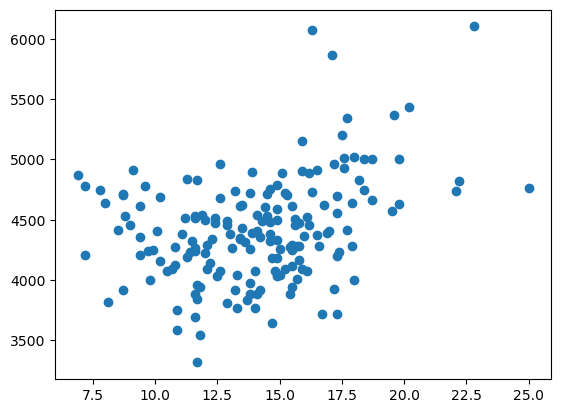

In [23]:
#trying out some scatterplots to check for relationships of different x's with Demand as the y
#multiple temperature variables will all be related (not independent from each other)
#many have outliers which I'm not sure if we need to address
plt.scatter(weather_demand_df['Minimum temperature (°C)'],weather_demand_df['Demand'])

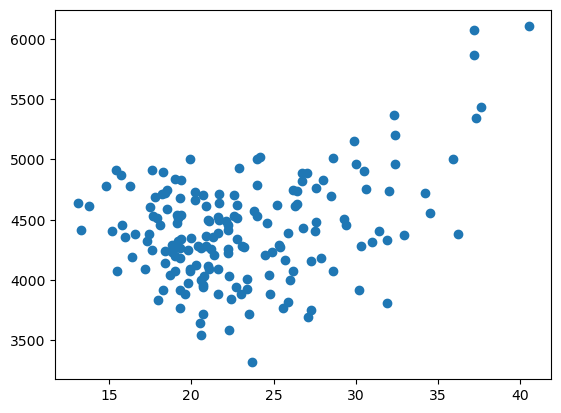

In [24]:
plt.scatter(weather_demand_df['Maximum temperature (°C)'],weather_demand_df['Demand'])


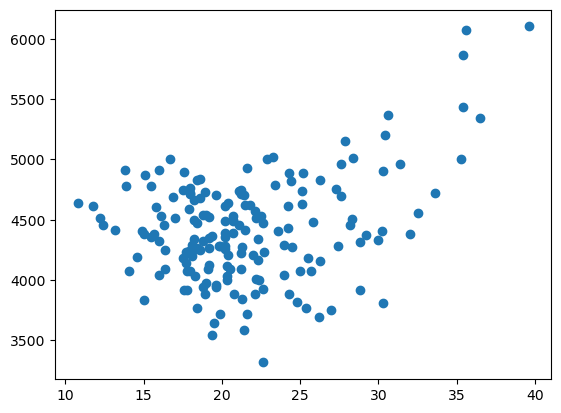

In [25]:
plt.scatter(weather_demand_df['3pm Temperature (°C)'],weather_demand_df['Demand'])


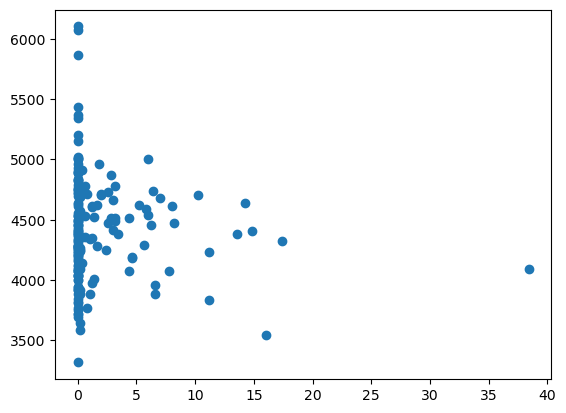

In [26]:
plt.scatter(weather_demand_df['Rainfall (mm)'],weather_demand_df['Demand'])


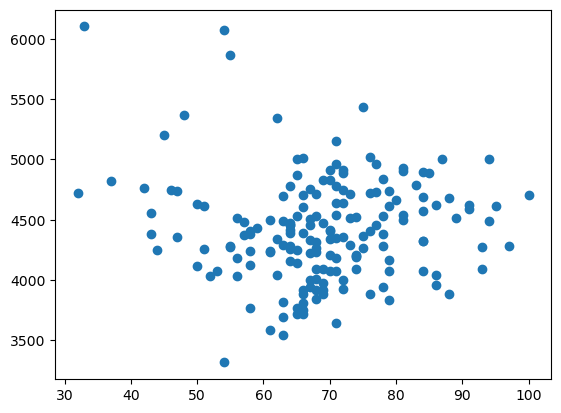

In [27]:
plt.scatter(weather_demand_df['9am relative humidity (%)'],weather_demand_df['Demand'])


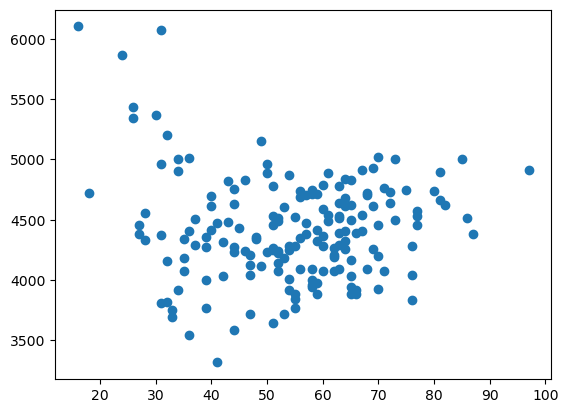

In [28]:
plt.scatter(weather_demand_df['3pm relative humidity (%)'],weather_demand_df['Demand'])


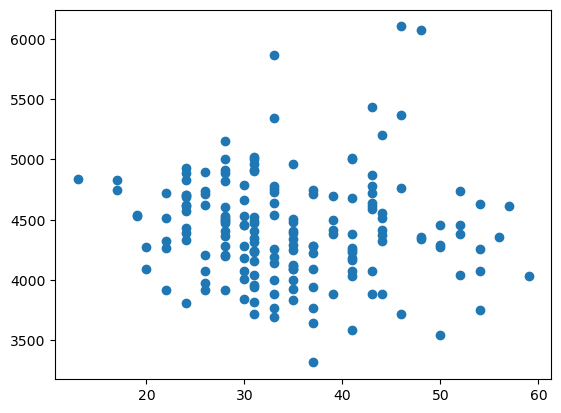

In [29]:
plt.scatter(weather_demand_df['Speed of maximum wind gust (km/h)'],weather_demand_df['Demand'])


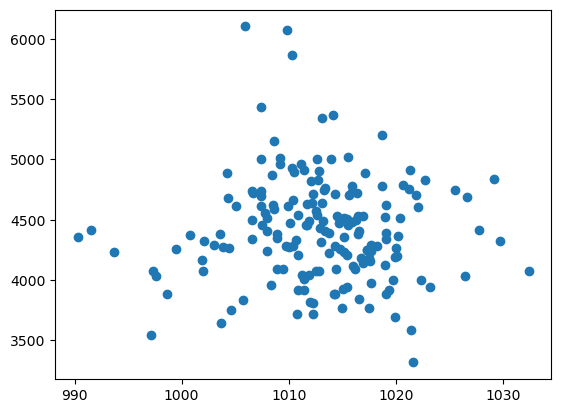

In [30]:
plt.scatter(weather_demand_df['3pm MSL pressure (hPa)'],weather_demand_df['Demand'])


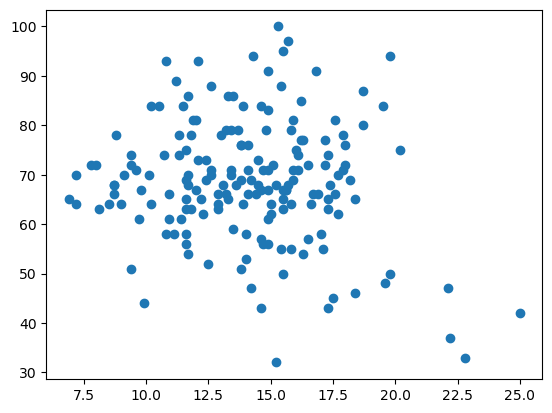

In [31]:
#for now, choosing two x variables that seem somewhat linear to y
#comparing the x values to each other for independence 
plt.scatter(weather_demand_df['Minimum temperature (°C)'],weather_demand_df['9am relative humidity (%)'])


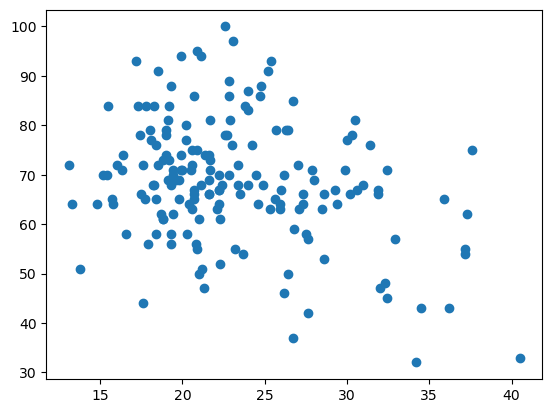

In [32]:
plt.scatter(weather_demand_df['Maximum temperature (°C)'],weather_demand_df['9am relative humidity (%)'])


In [33]:
#trying to build a regression model like in the worksheet

from sklearn import linear_model

X = weather_demand_df[['9am relative humidity (%)', 'Minimum temperature (°C)']]
y = weather_demand_df['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# partial code here...
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_test_predictions = lm.predict(X_test)
print('actual MEDV values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MEDV values of the first 5 test data:')
print(y_test_predictions[0:5])
print('')

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))

actual MEDV values of the first 5 test data:
Date
2023-04-05    4721.036250
2023-03-25    3884.456667
2023-02-10    4884.428125
2023-03-08    4339.123958
2023-03-21    4829.830833
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[4416.28755938 4309.10997414 4532.89198545 4345.35409744 4313.82339456]

Coefficients:  [-0.23215574 49.45576156]

Intercept:  3751.4418862898815

Coefficient of determination (test): -0.00
Coefficient of determination (training): 0.13


In [40]:
#something seems wrong here, coefficient should be between 0 and 1 ?

X = weather_demand_df[['9am relative humidity (%)', 'Maximum temperature (°C)']]
y = weather_demand_df['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# partial code here...
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_test_predictions = lm.predict(X_test)
print('actual MEDV values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MEDV values of the first 5 test data:')
print(y_test_predictions[0:5])
print('')

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))

actual MEDV values of the first 5 test data:
Date
2023-04-05    4721.036250
2023-03-25    3884.456667
2023-02-10    4884.428125
2023-03-08    4339.123958
2023-03-21    4829.830833
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[4284.49389384 4312.62045133 4576.55244164 4294.06241676 4307.64962491]

Coefficients:  [ 1.69840102 33.34613718]

Intercept:  3541.8464922142794

Coefficient of determination (test): -0.01
Coefficient of determination (training): 0.16


In [43]:

#another negative coefficient, not sure why
#trying to do this for one x variable
X = weather_demand_df[['Maximum temperature (°C)']]
y = weather_demand_df['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# partial code here...
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_test_predictions = lm.predict(X_test)
print('actual MEDV values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MEDV values of the first 5 test data:')
print(y_test_predictions[0:5])
print('')

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))

actual MEDV values of the first 5 test data:
Date
2023-04-05    4721.036250
2023-03-25    3884.456667
2023-02-10    4884.428125
2023-03-08    4339.123958
2023-03-21    4829.830833
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[4277.58732245 4316.16471222 4544.41426834 4309.73514726 4309.73514726]

Coefficients:  [32.14782481]

Intercept:  3686.067346032363

Coefficient of determination (test): -0.02
Coefficient of determination (training): 0.15


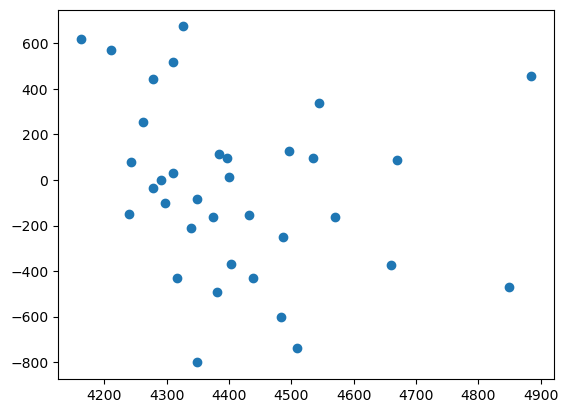

In [44]:
#trying to make a residual plot

import matplotlib.pyplot as plt


residuals= y_test - y_test_predictions
plt.scatter(y_test_predictions, residuals)

plt.show()

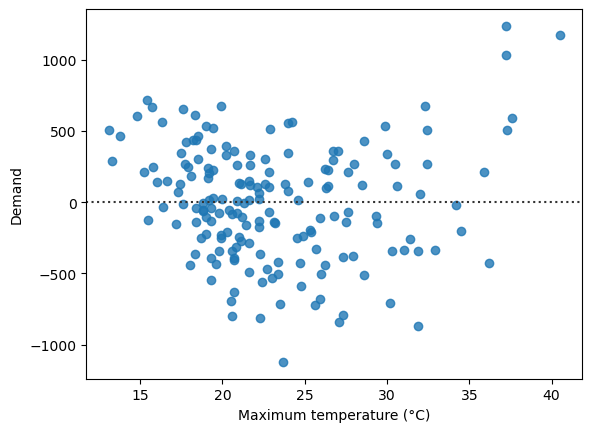

In [46]:
#another method from searching, for displaying residual plot, still working on this
#only works with one x?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  
 
sns.residplot(x=X, y=y)
  
plt.show()
